<a href="https://colab.research.google.com/github/estebanoli8/secop_valle_mujer/blob/main/no_supervisado_secop_mujer_valle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Agrupamiento de Contratos (Clustering): Utilizar algoritmos de clustering (como K-Means, DBSCAN o Hierarchical Clustering) para identificar segmentos naturales o grupos de contratos que comparten características similares. Esto podría revelar patrones ocultos en el tipo de contratos, entidades involucradas, objetos contractuales o modalidades de selección, sin necesidad de etiquetas previas. El objetivo sería agrupar contratos con 'objeto_a_contratar' e 'objeto_del_proceso' similares, valores de contrato en ciertos rangos, o que involucran a las mismas entidades/contratistas


In [4]:
# --- Cargar DataFrame desde Google Drive ---
import pandas as pd
print("--- Cargando DataFrame desde Google Drive ---")

# Montar Google Drive
print("  → Montando Google Drive...")
from google.colab import drive
try:
    drive.mount('/content/drive')
    print("     ✅ Google Drive montado correctamente.")
    drive_mounted = True
except Exception as e:
    print(f"     ❌ Error al montar Google Drive: {e}")
    drive_mounted = False

if drive_mounted:
    # Definir la ruta del archivo CSV en Google Drive
    folder_path = '/content/drive/MyDrive/hacemos con ingenieria'
    output_filename = 'contratos_analisis_exploratorio.csv'
    output_filepath = f'{folder_path}/{output_filename}'

    # Verificar si el archivo existe antes de intentar cargarlo
    import os
    if os.path.exists(output_filepath):
        print(f"\n  → Archivo encontrado: '{output_filepath}'. Cargando DataFrame...")
        try:
            df_contracts_loaded = pd.read_csv(output_filepath)
            print("     ✅ DataFrame cargado exitosamente.")
            # Asignar al nombre original del DataFrame si es necesario para análisis posteriores
            df_contracts = df_contracts_loaded
        except Exception as e:
            print(f"     ❌ Error al cargar DataFrame desde Drive: {e}")
            df_contracts_loaded = pd.DataFrame() # Crear un DataFrame vacío en caso de error
    else:
        print(f"\n  ⚠️ Archivo no encontrado en la ruta: '{output_filepath}'.")
        df_contracts_loaded = pd.DataFrame() # Crear un DataFrame vacío si el archivo no existe

else:
    print("  ⚠️ Google Drive no se montó correctamente. No se puede cargar el DataFrame.")
    df_contracts_loaded = pd.DataFrame() # Crear un DataFrame vacío si Drive no está montado

print("\n--- Carga desde Drive Completada ---")

--- Cargando DataFrame desde Google Drive ---
  → Montando Google Drive...
Mounted at /content/drive
     ✅ Google Drive montado correctamente.

  → Archivo encontrado: '/content/drive/MyDrive/hacemos con ingenieria/contratos_analisis_exploratorio.csv'. Cargando DataFrame...
     ✅ DataFrame cargado exitosamente.

--- Carga desde Drive Completada ---


In [2]:
df_contracts_loaded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2493 entries, 0 to 2492
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   nivel_entidad                     2493 non-null   object
 1   codigo_entidad_en_secop           2493 non-null   int64 
 2   nombre_de_la_entidad              2493 non-null   object
 3   nit_de_la_entidad                 2493 non-null   int64 
 4   departamento_entidad              2493 non-null   object
 5   municipio_entidad                 2493 non-null   object
 6   estado_del_proceso                2493 non-null   object
 7   modalidad_de_contrataci_n         2493 non-null   object
 8   objeto_a_contratar                2493 non-null   object
 9   objeto_del_proceso                2493 non-null   object
 10  tipo_de_contrato                  2493 non-null   object
 11  fecha_de_firma_del_contrato       2493 non-null   object
 12  fecha_inicio_ejecuci

In [8]:
print("--- Verificando valores únicos de 'tipo_de_contrato' ---")
print(df_contracts_loaded['tipo_de_contrato'].value_counts().to_markdown())
print("--- Verificación completada ---")

--- Verificando valores únicos de 'tipo_de_contrato' ---
| tipo_de_contrato        |   count |
|:------------------------|--------:|
| Prestación de Servicios |    2414 |
| otro                    |      46 |
| Suministros             |      16 |
| otro tipo de contrato   |      11 |
| decreto 092 de 2017     |       4 |
| compraventa             |       1 |
| obra                    |       1 |
--- Verificación completada ---


--- Generando histogramas para 'valor_final' y 'Rango_Valor_Fijo' ---


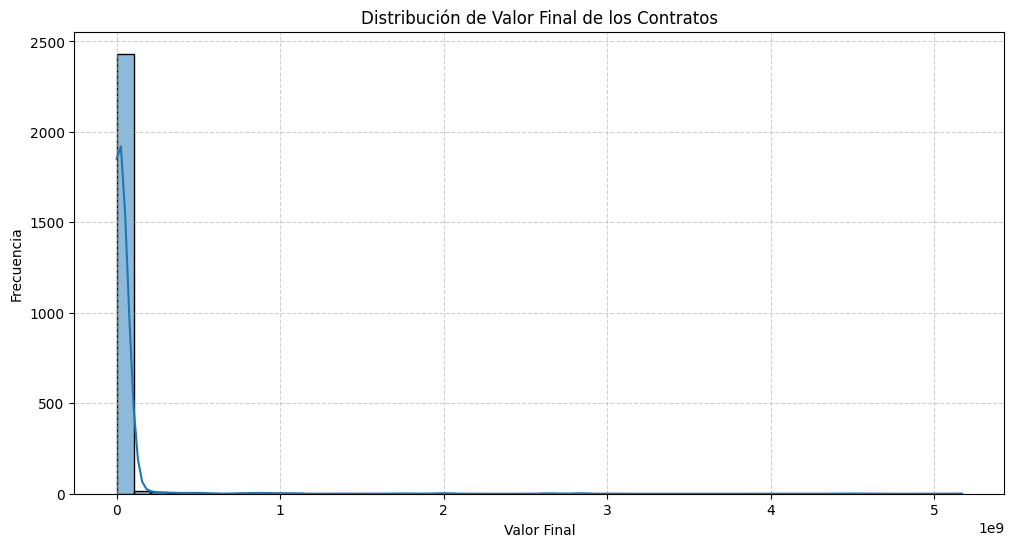

/tmp/ipython-input-3630194444.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_contracts_loaded['Rango_Valor_Fijo'], order=df_contracts_loaded['Rango_Valor_Fijo'].value_counts().index, palette='viridis')


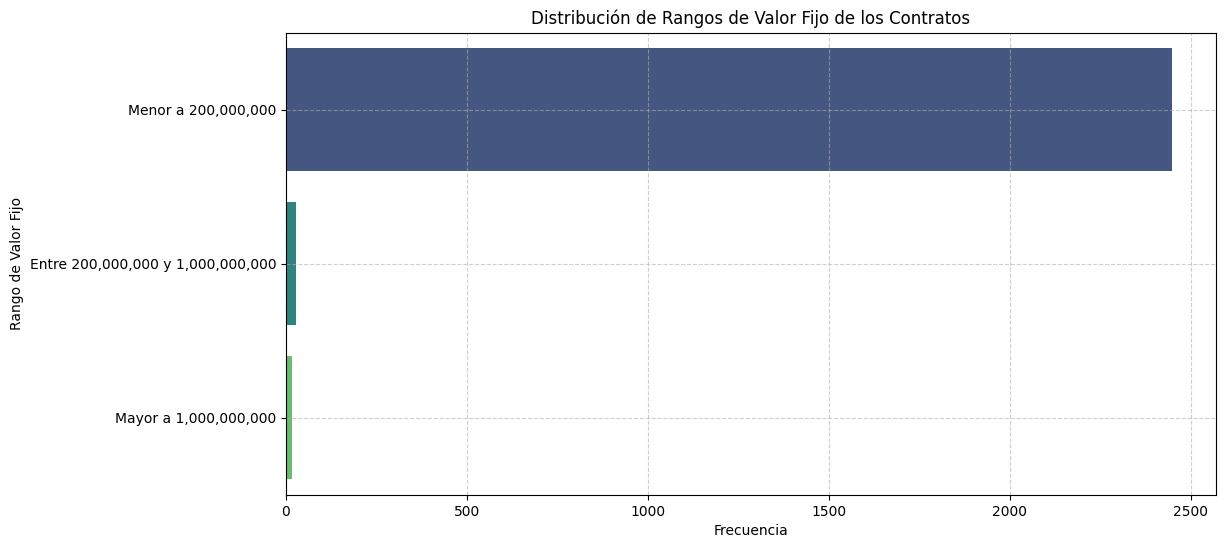

--- Histogramas generados exitosamente ---


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Generando histogramas para 'valor_final' y 'Rango_Valor_Fijo' ---")

# Histograma para 'valor_final'
plt.figure(figsize=(12, 6))
sns.histplot(df_contracts_loaded['valor_final'], kde=True, bins=50)
plt.title('Distribución de Valor Final de los Contratos')
plt.xlabel('Valor Final')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Histograma para 'Rango_Valor_Fijo'
plt.figure(figsize=(12, 6))
sns.countplot(y=df_contracts_loaded['Rango_Valor_Fijo'], order=df_contracts_loaded['Rango_Valor_Fijo'].value_counts().index, palette='viridis')
plt.title('Distribución de Rangos de Valor Fijo de los Contratos')
plt.xlabel('Frecuencia')
plt.ylabel('Rango de Valor Fijo')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print("--- Histogramas generados exitosamente ---")

--- Visualizando outliers en 'valor_contrato' con un Boxplot ---


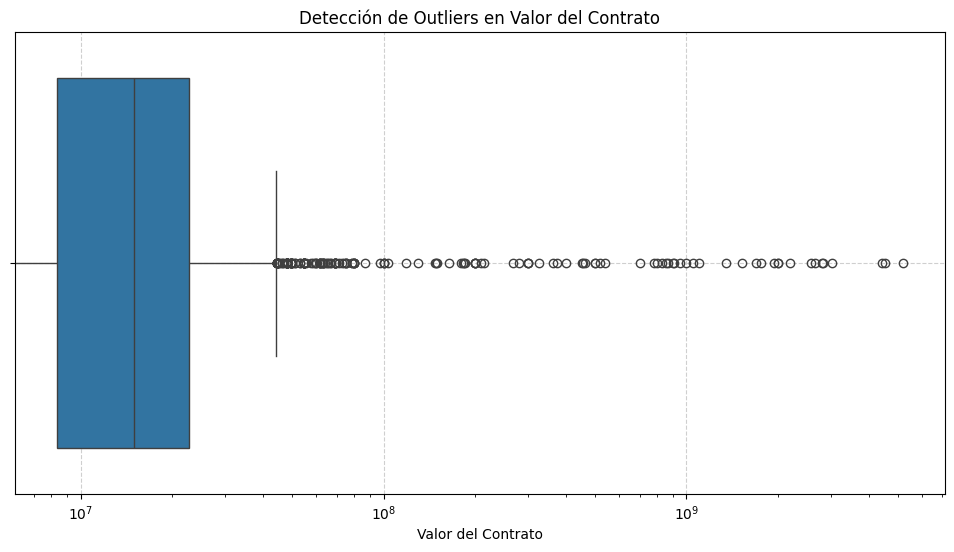

--- Listando los 10 contratos con valores más elevados ---
| objeto_a_contratar                                                                                                                                                                                                                                                                                                                                                                                                      |   valor_contrato | fecha_de_firma_del_contrato   | nom_raz_social_contratista     | nombre_de_la_entidad                                                             |
|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

print("--- Visualizando outliers en 'valor_contrato' con un Boxplot ---")

plt.figure(figsize=(12, 6))
sns.boxplot(x=df_contracts['valor_contrato'])
plt.title('Detección de Outliers en Valor del Contrato')
plt.xlabel('Valor del Contrato')
plt.xscale('log') # Usar escala logarítmica si los valores son muy dispersos
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print("--- Listando los 10 contratos con valores más elevados ---")

# Ordenar el DataFrame por 'valor_contrato' de forma descendente y seleccionar los 10 primeros
top_10_high_value_contracts = df_contracts.sort_values(by='valor_contrato', ascending=False).head(10)

# Columnas a mostrar para los contratos top
display_cols_outliers = [
    'objeto_a_contratar',
    'valor_contrato',
    'fecha_de_firma_del_contrato',
    'nom_raz_social_contratista',
    'nombre_de_la_entidad'
]

# Imprimir los detalles de los 10 contratos con mayor valor
print(top_10_high_value_contracts[display_cols_outliers].to_markdown(index=False))

print("--- Análisis de outliers y contratos elevados completado ---")

In [10]:
print("--- Listando contratos con 'valor_contrato' entre 200 millones y 1000 millones ---")

# Filtrar el DataFrame por la condición de valor_contrato en millones
filtered_contracts = df_contracts[
    (df_contracts['valor_contrato'] > 200 * 1_000_000) &
    (df_contracts['valor_contrato'] < 1000 * 1_000_000)
]

# Columnas a mostrar para los contratos filtrados
display_cols_filtered = [
    'objeto_a_contratar',
    'valor_contrato',
    'fecha_de_firma_del_contrato',
    'nom_raz_social_contratista',
    'nombre_de_la_entidad'
]

# Imprimir los detalles de los contratos filtrados
if not filtered_contracts.empty:
    print(filtered_contracts[display_cols_filtered].to_markdown(index=False))
else:
    print("No se encontraron contratos en el rango de valor_contrato entre 200 millones y 1000 millones.")

print("--- Listado de contratos completado ---")

--- Listando contratos con 'valor_contrato' entre 200 millones y 1000 millones ---
| objeto_a_contratar                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [11]:
df_contracts.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2493 entries, 0 to 2492
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   nivel_entidad                     2493 non-null   object 
 1   codigo_entidad_en_secop           2493 non-null   int64  
 2   nombre_de_la_entidad              2493 non-null   object 
 3   nit_de_la_entidad                 2493 non-null   int64  
 4   departamento_entidad              2493 non-null   object 
 5   municipio_entidad                 2493 non-null   object 
 6   estado_del_proceso                2493 non-null   object 
 7   modalidad_de_contrataci_n         2493 non-null   object 
 8   objeto_a_contratar                2493 non-null   object 
 9   objeto_del_proceso                2493 non-null   object 
 10  tipo_de_contrato                  2493 non-null   object 
 11  fecha_de_firma_del_contrato       2493 non-null   object 
 12  fecha_

In [5]:
# Asegurarse de que df_contracts esté definido en caso de que el kernel se haya reiniciado o las celdas no se hayan ejecutado en orden.
# La línea 'df_contracts = df_contracts_loaded' ha sido eliminada para evitar NameError ya que df_contracts debería estar globalmente disponible.

print("--- Listando los contratos con los valores más altos en el rango de 0 a 200 millones ---")

# Filtrar el DataFrame para contratos en el rango de 0 a 200 millones
filtered_contracts_200M = df_contracts[
    (df_contracts['valor_contrato'] > 0) &
    (df_contracts['valor_contrato'] <= 200 * 1_000_000)
]

# Ordenar los contratos filtrados por 'valor_contrato' de forma descendente y seleccionar los 10 primeros
top_contracts_200M = filtered_contracts_200M.sort_values(by='valor_contrato', ascending=False).head(10)

# Columnas a mostrar para los contratos top en este rango
display_cols = [
    'objeto_a_contratar',
    'valor_contrato',
    'fecha_de_firma_del_contrato',
    'nom_raz_social_contratista',
    'nombre_de_la_entidad'
]

# Imprimir los detalles de los contratos encontrados
if not top_contracts_200M.empty:
    print(top_contracts_200M[display_cols].to_markdown(index=False))
else:
    print("No se encontraron contratos en el rango de valor_contrato entre 0 y 200 millones o la lista está vacía.")

print("--- Listado completado ---")

--- Listando los contratos con los valores más altos en el rango de 0 a 200 millones ---
| objeto_a_contratar                                                                                                                                                                                                                                                                                                                                                                                                                              |   valor_contrato | fecha_de_firma_del_contrato   | nom_raz_social_contratista                              | nombre_de_la_entidad                                                                                   |
|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

vas a crear dos data sets nuevos. df_ps y df_empresas

todos los registros de el data set actual tendrá que ir a uno o a otro de los dos nuevos data sets.
la diferenciación para ponerlos en uno o en otro es: en

--- Generando histograma (countplot) para 'tipo_de_contrato' con valores en barras ---


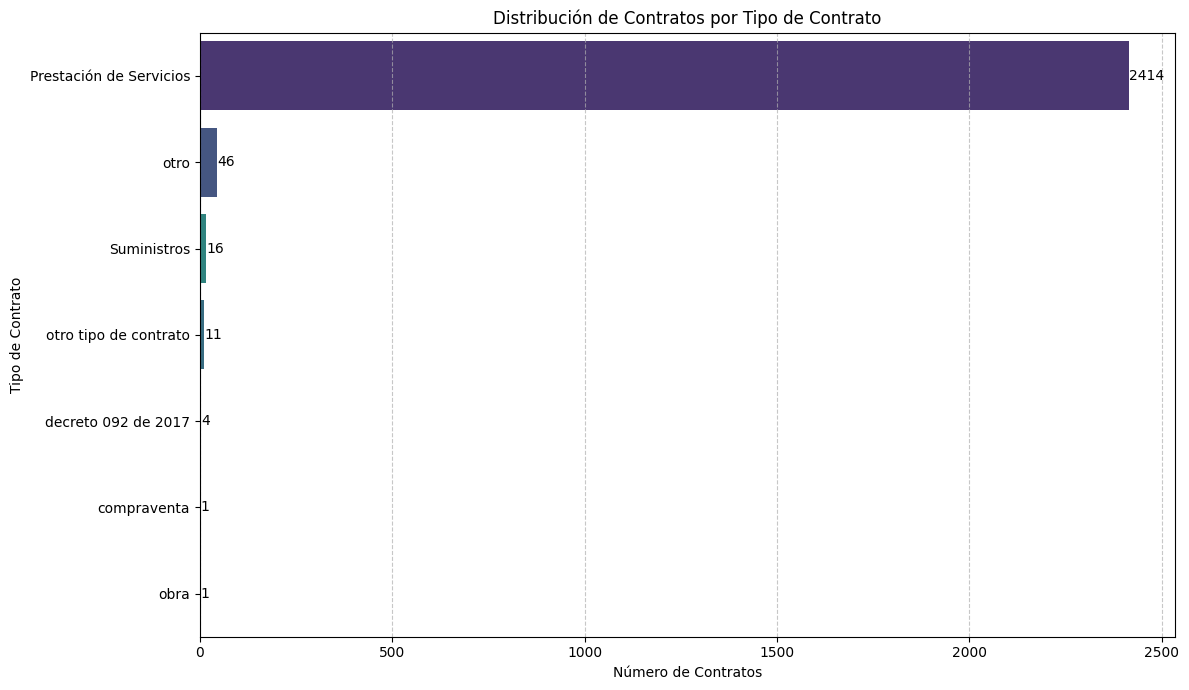

--- Histograma (countplot) generado exitosamente ---

--- Generando histograma para 'valor_contrato' de contratos de 'Prestación de Servicios' (Escala Logarítmica) ---


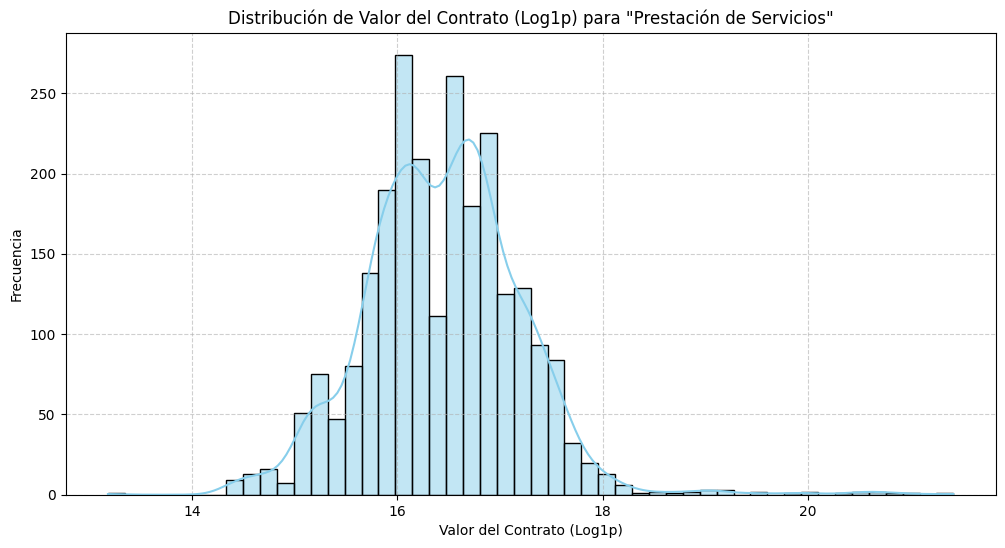


--- Generando histograma para 'valor_contrato' del resto de contratos (Escala Logarítmica) ---


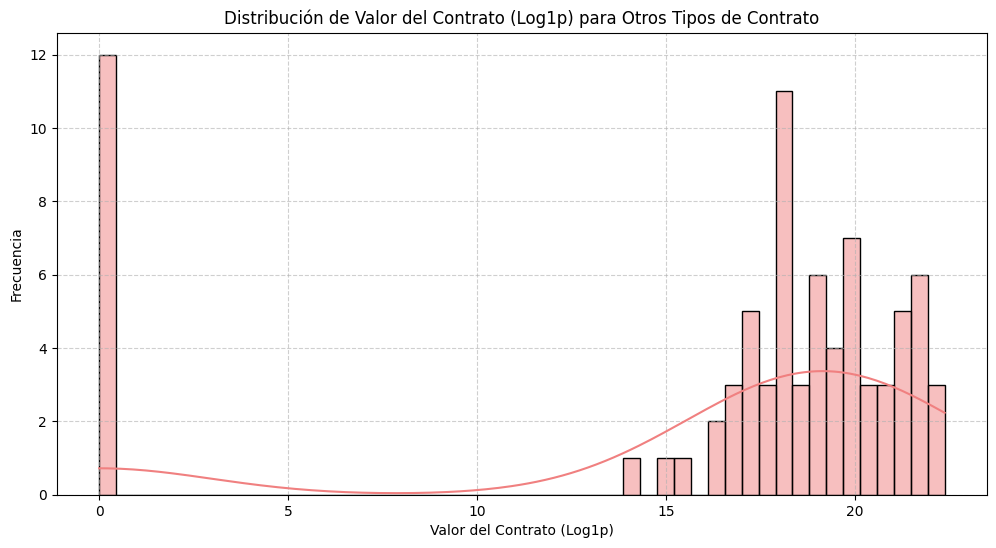


--- Histogramas adicionales generados exitosamente ---


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("--- Generando histograma (countplot) para 'tipo_de_contrato' con valores en barras ---")

plt.figure(figsize=(12, 7))
ax = sns.countplot(y=df_contracts_loaded['tipo_de_contrato'], order=df_contracts_loaded['tipo_de_contrato'].value_counts().index, palette='viridis', hue=df_contracts_loaded['tipo_de_contrato'], legend=False)
plt.title('Distribución de Contratos por Tipo de Contrato')
plt.xlabel('Número de Contratos')
plt.ylabel('Tipo de Contrato')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Añadir valores en cada barra para el countplot
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.1, p.get_y() + p.get_height() / 2, f'{int(width)}', va='center')

plt.tight_layout()
plt.show()

print("--- Histograma (countplot) generado exitosamente ---")

# --- Nuevos histogramas solicitados con escala logarítmica ---
print("\n--- Generando histograma para 'valor_contrato' de contratos de 'Prestación de Servicios' (Escala Logarítmica) ---")

# Filtrar contratos de 'Prestación de Servicios'
df_ps = df_contracts_loaded[df_contracts_loaded['tipo_de_contrato'] == 'Prestación de Servicios']

if not df_ps.empty:
    # Aplicar transformación logarítmica a los valores
    valor_ps_log = np.log1p(df_ps['valor_contrato'])

    plt.figure(figsize=(12, 6))
    sns.histplot(valor_ps_log, kde=True, bins=50, color='skyblue')
    plt.title('Distribución de Valor del Contrato (Log1p) para "Prestación de Servicios"')
    plt.xlabel('Valor del Contrato (Log1p)')
    plt.ylabel('Frecuencia')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()
else:
    print("  ⚠️ No se encontraron contratos de 'Prestación de Servicios'.")

print("\n--- Generando histograma para 'valor_contrato' del resto de contratos (Escala Logarítmica) ---")

# Filtrar el resto de contratos (no 'Prestación de Servicios')
df_resto = df_contracts_loaded[df_contracts_loaded['tipo_de_contrato'] != 'Prestación de Servicios']

if not df_resto.empty:
    # Aplicar transformación logarítmica a los valores
    valor_resto_log = np.log1p(df_resto['valor_contrato'])

    plt.figure(figsize=(12, 6))
    sns.histplot(valor_resto_log, kde=True, bins=50, color='lightcoral')
    plt.title('Distribución de Valor del Contrato (Log1p) para Otros Tipos de Contrato')
    plt.xlabel('Valor del Contrato (Log1p)')
    plt.ylabel('Frecuencia')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()
else:
    print("  ⚠️ No se encontraron otros tipos de contrato.")

print("\n--- Histogramas adicionales generados exitosamente ---")

In [11]:
print("--- Listando contratos con 'tipo_de_contrato' igual a 'otro' ---")

# Filtrar el DataFrame por la condición tipo_de_contrato == 'otro'
filtered_otro_contracts = df_contracts_loaded[df_contracts_loaded['tipo_de_contrato'] == 'otro']

# Columnas a mostrar para los contratos filtrados
display_cols_otro = [
    'objeto_a_contratar',
    'valor_contrato',
    'fecha_de_firma_del_contrato',
    'nom_raz_social_contratista',
    'nombre_de_la_entidad'
]

# Imprimir los detalles de los contratos filtrados
if not filtered_otro_contracts.empty:
    print(filtered_otro_contracts[display_cols_otro].to_markdown(index=False))
else:
    print("No se encontraron contratos con 'tipo_de_contrato' igual a 'otro'.")

print("--- Listado de contratos 'otro' completado ---")

--- Listando contratos con 'tipo_de_contrato' igual a 'otro' ---
| objeto_a_contratar                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |   valor_contrato | fecha_de_firma_del_contrato   | nom_raz_social_contratista                                                      | nombre_de_la_entidad                                                                                   |
|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

--- Generando histograma (countplot) para 'tipo_documento_proveedor' ---


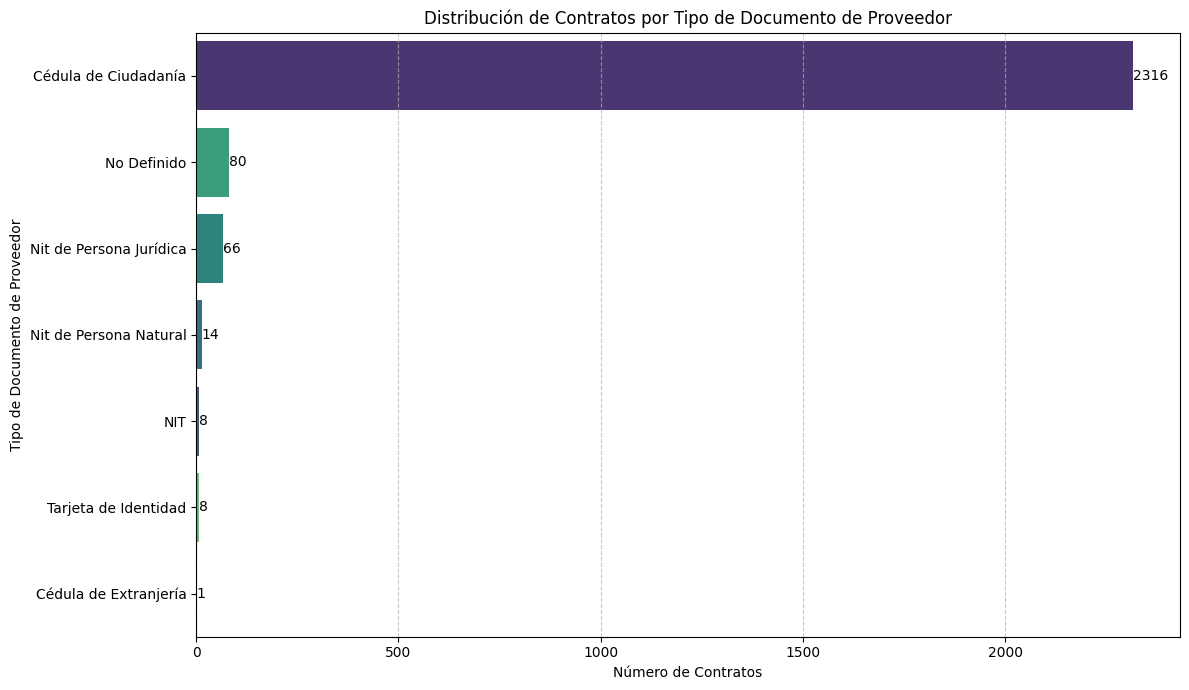

--- Histograma (countplot) generado exitosamente ---


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Generando histograma (countplot) para 'tipo_documento_proveedor' ---")

plt.figure(figsize=(12, 7))
ax = sns.countplot(y=df_contracts_loaded['tipo_documento_proveedor'], order=df_contracts_loaded['tipo_documento_proveedor'].value_counts().index, palette='viridis', hue=df_contracts_loaded['tipo_documento_proveedor'], legend=False)
plt.title('Distribución de Contratos por Tipo de Documento de Proveedor')
plt.xlabel('Número de Contratos')
plt.ylabel('Tipo de Documento de Proveedor')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Añadir valores en cada barra
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.1, p.get_y() + p.get_height() / 2, f'{int(width)}', va='center')

plt.tight_layout()
plt.show()

print("--- Histograma (countplot) generado exitosamente ---")

In [15]:
print("--- Verificando valores únicos y conteos de 'tipo_documento_proveedor' ---")
print(df_contracts_loaded['tipo_documento_proveedor'].value_counts().to_markdown())
print("--- Verificación completada ---")

--- Verificando valores únicos y conteos de 'tipo_documento_proveedor' ---
| tipo_documento_proveedor   |   count |
|:---------------------------|--------:|
| Cédula de Ciudadanía       |    2316 |
| No Definido                |      80 |
| Nit de Persona Jurídica    |      66 |
| Nit de Persona Natural     |      14 |
| NIT                        |       8 |
| Tarjeta de Identidad       |       8 |
| Cédula de Extranjería      |       1 |
--- Verificación completada ---


In [17]:
print("--- Listando 100 contratos aleatorios con 'tipo_documento_proveedor' igual a 'Cédula de Ciudadanía' ---")

# Filtrar el DataFrame por la condición tipo_documento_proveedor == 'Cédula de Ciudadanía'
filtered_cc_contracts = df_contracts_loaded[df_contracts_loaded['tipo_documento_proveedor'] == 'Cédula de Ciudadanía']

# Seleccionar 100 contratos aleatorios si hay suficientes, de lo contrario, seleccionar todos
if len(filtered_cc_contracts) >= 100:
    random_cc_contracts = filtered_cc_contracts.sample(n=100, random_state=42) # Usar random_state para reproducibilidad
else:
    random_cc_contracts = filtered_cc_contracts

# Columnas a mostrar para los contratos filtrados
display_cols = [
    'objeto_a_contratar',
    'valor_contrato',
    'fecha_de_firma_del_contrato',
    'nom_raz_social_contratista',
    'nombre_de_la_entidad'
]

# Imprimir los detalles de los contratos filtrados
if not random_cc_contracts.empty:
    print(random_cc_contracts[display_cols].to_markdown(index=False))
else:
    print("No se encontraron contratos con 'tipo_documento_proveedor' igual a 'Cédula de Ciudadanía' o la lista está vacía.")

print("--- Listado de 100 contratos aleatorios 'Cédula de Ciudadanía' completado ---")

--- Listando 100 contratos aleatorios con 'tipo_documento_proveedor' igual a 'Cédula de Ciudadanía' ---
| objeto_a_contratar                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |   valor_contrato | fecha_de_firma_del_contrato   | nom_raz_social_contratista          | nombre_de_la_entidad                                                             |
|:-------------------------------------------------------------------------------------------------------------------------------

In [16]:
print("--- Listando contratos con 'tipo_documento_proveedor' igual a 'No Definido' ---")

# Filtrar el DataFrame por la condición tipo_documento_proveedor == 'No Definido'
filtered_no_definido_contracts = df_contracts_loaded[df_contracts_loaded['tipo_documento_proveedor'] == 'No Definido']

# Columnas a mostrar para los contratos filtrados (utilizando la misma lista de columnas para consistencia)
display_cols_no_definido = [
    'objeto_a_contratar',
    'valor_contrato',
    'fecha_de_firma_del_contrato',
    'nom_raz_social_contratista',
    'nombre_de_la_entidad'
]

# Imprimir los detalles de los contratos filtrados
if not filtered_no_definido_contracts.empty:
    print(filtered_no_definido_contracts[display_cols_no_definido].to_markdown(index=False))
else:
    print("No se encontraron contratos con 'tipo_documento_proveedor' igual a 'No Definido'.")

print("--- Listado de contratos 'No Definido' completado ---")

--- Listando contratos con 'tipo_documento_proveedor' igual a 'No Definido' ---
| objeto_a_contratar                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |   valor_contrato | fecha_de_firma_del_contrato   | nom_raz_social_contratista                                                      | nombre_de_la_entidad                                                                                   |
|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [18]:
print("--- Listando contratos con 'tipo_documento_proveedor' igual a 'Nit de Persona Natural' ---")

# Filtrar el DataFrame por la condición tipo_documento_proveedor == 'Nit de Persona Natural'
filtered_nit_natural_contracts = df_contracts_loaded[df_contracts_loaded['tipo_documento_proveedor'] == 'Nit de Persona Natural']

# Columnas a mostrar para los contratos filtrados
display_cols = [
    'objeto_a_contratar',
    'valor_contrato',
    'fecha_de_firma_del_contrato',
    'nom_raz_social_contratista',
    'nombre_de_la_entidad'
]

# Imprimir los detalles de los contratos filtrados
if not filtered_nit_natural_contracts.empty:
    print(filtered_nit_natural_contracts[display_cols].to_markdown(index=False))
else:
    print("No se encontraron contratos con 'tipo_documento_proveedor' igual a 'Nit de Persona Natural'.")

print("--- Listado de contratos 'Nit de Persona Natural' completado ---")

--- Listando contratos con 'tipo_documento_proveedor' igual a 'Nit de Persona Natural' ---
| objeto_a_contratar                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |   valor_contrato | fecha_de_firma_del_contrato   | nom_raz_

In [19]:
print("--- Listando contratos con 'valor_contrato' igual a 0 ---")

# Filtrar el DataFrame por la condición valor_contrato == 0
zero_value_contracts = df_contracts_loaded[df_contracts_loaded['valor_contrato'] == 0]

# Columnas a mostrar para los contratos filtrados
display_cols_zero_value = [
    'objeto_a_contratar',
    'valor_contrato',
    'fecha_de_firma_del_contrato',
    'nom_raz_social_contratista',
    'nombre_de_la_entidad'
]

# Imprimir los detalles de los contratos filtrados
if not zero_value_contracts.empty:
    print(zero_value_contracts[display_cols_zero_value].to_markdown(index=False))
else:
    print("No se encontraron contratos con 'valor_contrato' igual a 0.")

print("--- Listado de contratos con valor 0 completado ---")

--- Listando contratos con 'valor_contrato' igual a 0 ---
| objeto_a_contratar                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |   valor_contrato | fecha_de_firma_del_contrato   | nom_raz_social_contratista                                                                           | nombre_de_la_entidad                                                             |
|:----------------------------------------------------------

--- Generando gráficos de distribución de 'valor_contrato' por categorías ---


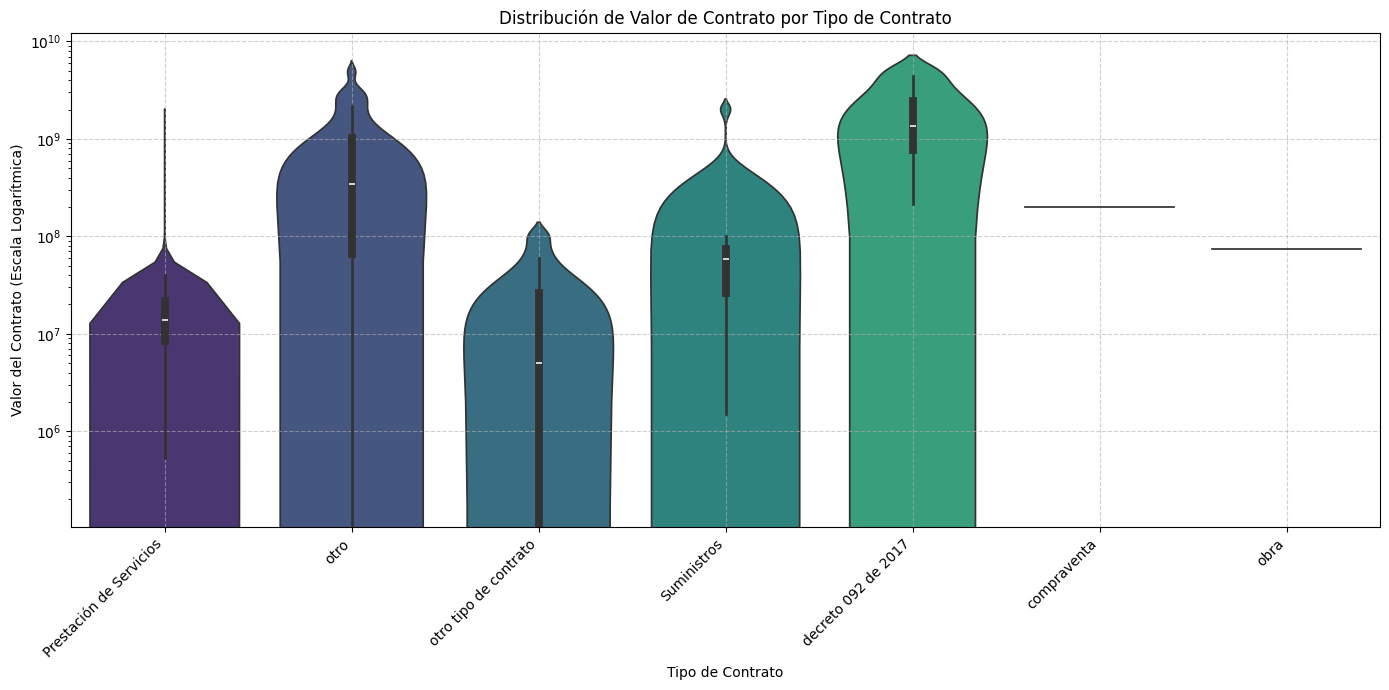

/tmp/ipython-input-1862248768.py:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


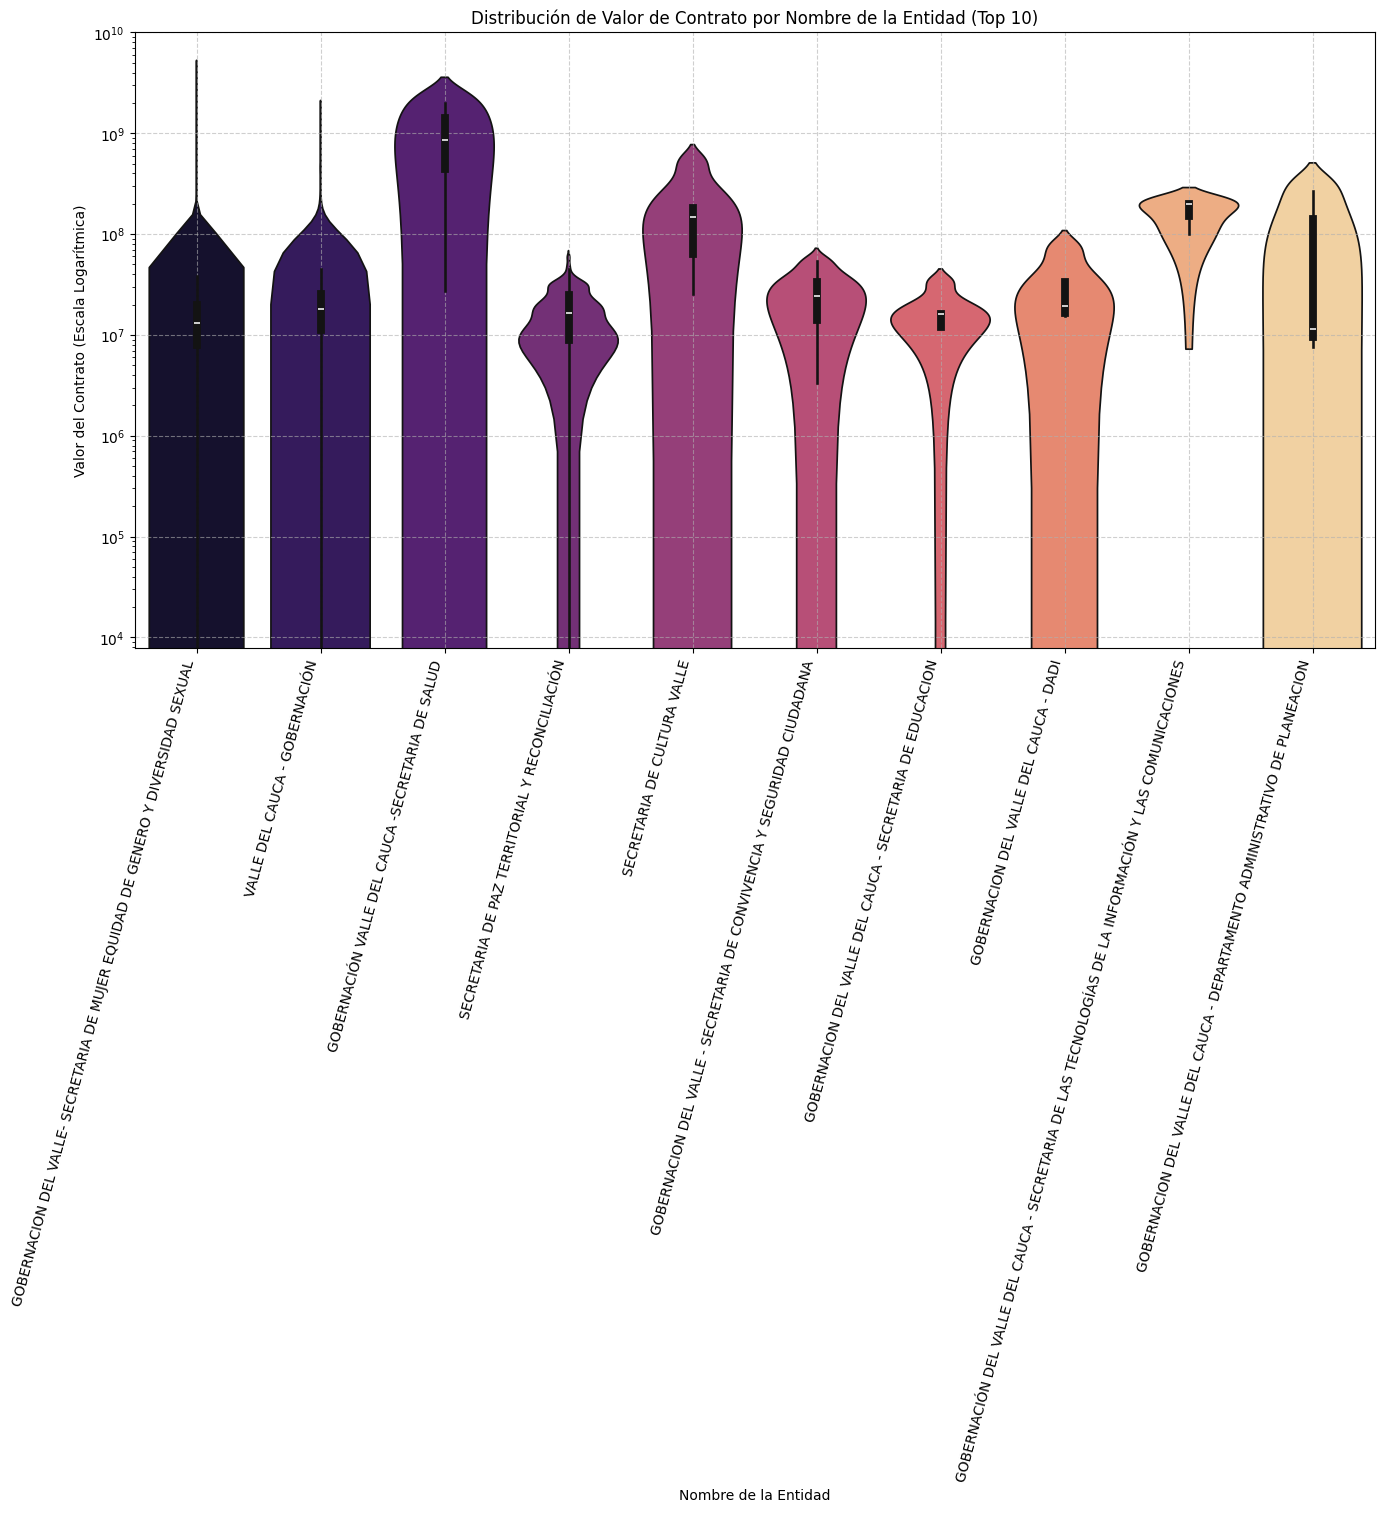

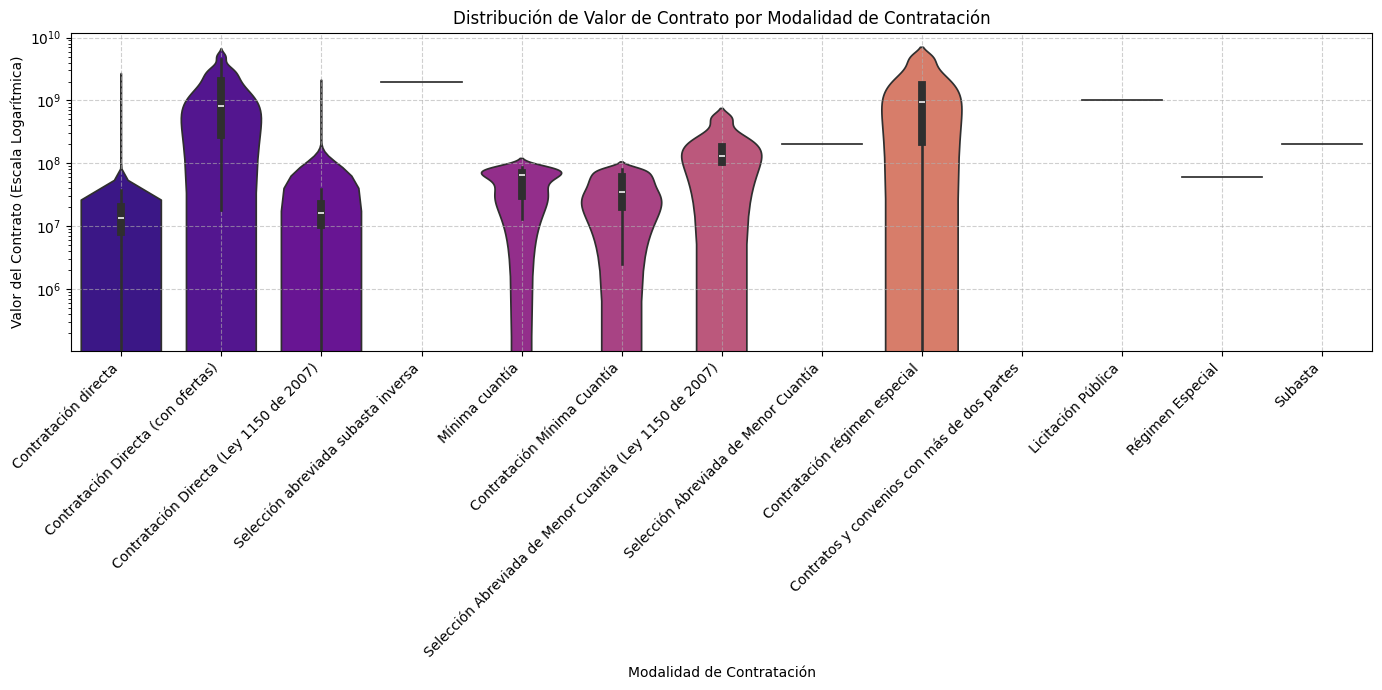

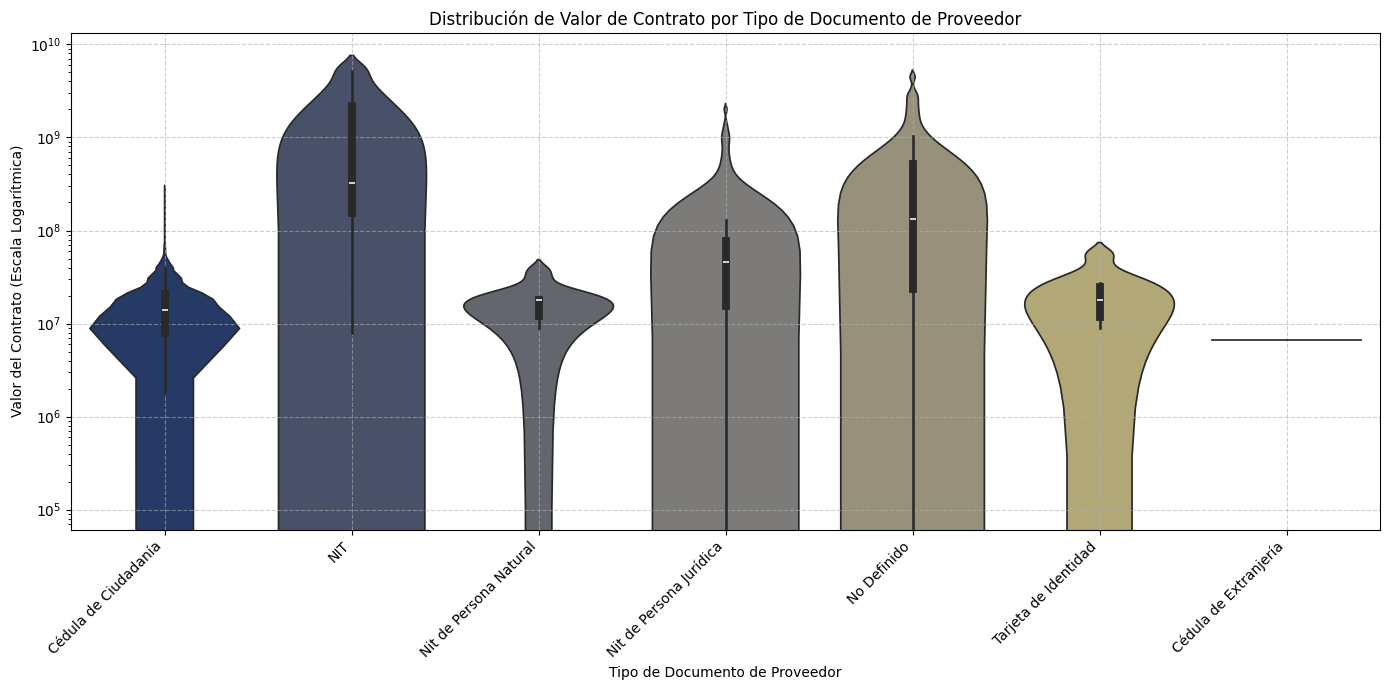

--- Generación de gráficos completada ---


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Generando gráficos de distribución de 'valor_contrato' por categorías ---")

# 1. Gráfico: 'tipo_de_contrato' vs 'valor_contrato'
plt.figure(figsize=(14, 7))
sns.violinplot(x='tipo_de_contrato', y='valor_contrato', data=df_contracts_loaded, palette='viridis', hue='tipo_de_contrato', legend=False)
plt.title('Distribución de Valor de Contrato por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Valor del Contrato (Escala Logarítmica)')
plt.yscale('log')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 2. Gráfico: 'nombre_de_la_entidad' vs 'valor_contrato'
# Para 'nombre_de_la_entidad', puede haber muchas categorías. Se mostrarán los 10 principales para no saturar el gráfico.
top_10_entities = df_contracts_loaded['nombre_de_la_entidad'].value_counts().head(10).index
df_top_entities = df_contracts_loaded[df_contracts_loaded['nombre_de_la_entidad'].isin(top_10_entities)]

plt.figure(figsize=(16, 8))
sns.violinplot(x='nombre_de_la_entidad', y='valor_contrato', data=df_top_entities, palette='magma', hue='nombre_de_la_entidad', legend=False)
plt.title('Distribución de Valor de Contrato por Nombre de la Entidad (Top 10)')
plt.xlabel('Nombre de la Entidad')
plt.ylabel('Valor del Contrato (Escala Logarítmica)')
plt.yscale('log')
plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 3. Gráfico: 'modalidad_de_contrataci_n' vs 'valor_contrato'
plt.figure(figsize=(14, 7))
sns.violinplot(x='modalidad_de_contrataci_n', y='valor_contrato', data=df_contracts_loaded, palette='plasma', hue='modalidad_de_contrataci_n', legend=False)
plt.title('Distribución de Valor de Contrato por Modalidad de Contratación')
plt.xlabel('Modalidad de Contratación')
plt.ylabel('Valor del Contrato (Escala Logarítmica)')
plt.yscale('log')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 4. Gráfico: 'tipo_documento_proveedor' vs 'valor_contrato'
plt.figure(figsize=(14, 7))
sns.violinplot(x='tipo_documento_proveedor', y='valor_contrato', data=df_contracts_loaded, palette='cividis', hue='tipo_documento_proveedor', legend=False)
plt.title('Distribución de Valor de Contrato por Tipo de Documento de Proveedor')
plt.xlabel('Tipo de Documento de Proveedor')
plt.ylabel('Valor del Contrato (Escala Logarítmica)')
plt.yscale('log')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print("--- Generación de gráficos completada ---")

In [23]:
print("--- Creando nuevos DataFrames y mostrando su información ---")

# Definir las columnas comunes que se incluirán en los nuevos DataFrames
common_cols = [
    'nombre_de_la_entidad',
    'objeto_a_contratar',
    'objeto_del_proceso',
    'tipo_de_contrato',
    'fecha_de_firma_del_contrato',
    'fecha_inicio_ejecuci_n',
    'fecha_fin_ejecuci_n',
    'valor_contrato',
    'url_contrato',
    'Año_Contrato',
    'nom_raz_social_contratista_corto'
]

# 1. Crear df_cero
print("\n--- Creando df_cero (contratos con valor_contrato = 0) ---")
df_cero = df_contracts_loaded[df_contracts_loaded['valor_contrato'] == 0][common_cols].copy()
print("df_cero.info():")
df_cero.info()

# 2. Crear df_ps (personas naturales y físicas)
print("\n--- Creando df_ps (tipo_documento_proveedor: Cédula de Ciudadanía, Nit de Persona Natural, Tarjeta de Identidad, Cédula de Extranjería) ---")
ps_doc_types = ['Cédula de Ciudadanía', 'Nit de Persona Natural', 'Tarjeta de Identidad', 'Cédula de Extranjería']
df_ps = df_contracts_loaded[df_contracts_loaded['tipo_documento_proveedor'].isin(ps_doc_types)][common_cols].copy()
print("df_ps.info():")
df_ps.info()

# 3. Crear df_empresas (empresas y no definidos)
print("\n--- Creando df_empresas (tipo_documento_proveedor: NIT, No Definido, Nit de Persona Jurídica) ---")
empresas_doc_types = ['NIT', 'No Definido', 'Nit de Persona Jurídica']
df_empresas = df_contracts_loaded[df_contracts_loaded['tipo_documento_proveedor'].isin(empresas_doc_types)][common_cols].copy()
print("df_empresas.info():")
df_empresas.info()

print("\n--- Creación y verificación de DataFrames completada ---")

--- Creando nuevos DataFrames y mostrando su información ---

--- Creando df_cero (contratos con valor_contrato = 0) ---
df_cero.info():
<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 179 to 2337
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   nombre_de_la_entidad              12 non-null     object
 1   objeto_a_contratar                12 non-null     object
 2   objeto_del_proceso                12 non-null     object
 3   tipo_de_contrato                  12 non-null     object
 4   fecha_de_firma_del_contrato       12 non-null     object
 5   fecha_inicio_ejecuci_n            12 non-null     object
 6   fecha_fin_ejecuci_n               12 non-null     object
 7   valor_contrato                    12 non-null     int64 
 8   url_contrato                      12 non-null     object
 9   Año_Contrato                      12 non-null     int64 
 10  nom_raz_soci

In [24]:
import os

print("--- Guardando nuevos DataFrames en Google Drive como CSV ---")

# Definir la ruta base en Google Drive (asumiendo que ya está montado)
# Usaremos la misma ruta donde se cargó el dataframe original para consistencia
base_folder_path = '/content/drive/MyDrive/hacemos con ingenieria'

# Asegurarse de que el directorio existe
if not os.path.exists(base_folder_path):
    print(f"  ⚠️ La carpeta '{base_folder_path}' no existe. Creándola...")
    os.makedirs(base_folder_path)

# Guardar df_cero
output_filepath_cero = os.path.join(base_folder_path, 'df_cero_contratos.csv')
try:
    df_cero.to_csv(output_filepath_cero, index=False)
    print(f"  ✅ df_cero guardado exitosamente en '{output_filepath_cero}'.")
except Exception as e:
    print(f"  ❌ Error al guardar df_cero: {e}")

# Guardar df_ps
output_filepath_ps = os.path.join(base_folder_path, 'df_ps_contratos.csv')
try:
    df_ps.to_csv(output_filepath_ps, index=False)
    print(f"  ✅ df_ps guardado exitosamente en '{output_filepath_ps}'.")
except Exception as e:
    print(f"  ❌ Error al guardar df_ps: {e}")

# Guardar df_empresas
output_filepath_empresas = os.path.join(base_folder_path, 'df_empresas_contratos.csv')
try:
    df_empresas.to_csv(output_filepath_empresas, index=False)
    print(f"  ✅ df_empresas guardado exitosamente en '{output_filepath_empresas}'.")
except Exception as e:
    print(f"  ❌ Error al guardar df_empresas: {e}")

print("--- Guardado de DataFrames completado ---")

--- Guardando nuevos DataFrames en Google Drive como CSV ---
  ✅ df_cero guardado exitosamente en '/content/drive/MyDrive/hacemos con ingenieria/df_cero_contratos.csv'.
  ✅ df_ps guardado exitosamente en '/content/drive/MyDrive/hacemos con ingenieria/df_ps_contratos.csv'.
  ✅ df_empresas guardado exitosamente en '/content/drive/MyDrive/hacemos con ingenieria/df_empresas_contratos.csv'.
--- Guardado de DataFrames completado ---


--- Generando histogramas para 'valor_contrato' de cada nuevo DataFrame ---

--- Análisis de 'valor_contrato' en df_cero ---
  ✅ Todos los contratos en df_cero tienen 'valor_contrato' igual a 0. No se genera histograma.

--- Histograma para 'valor_contrato' en df_ps (Escala Logarítmica) ---


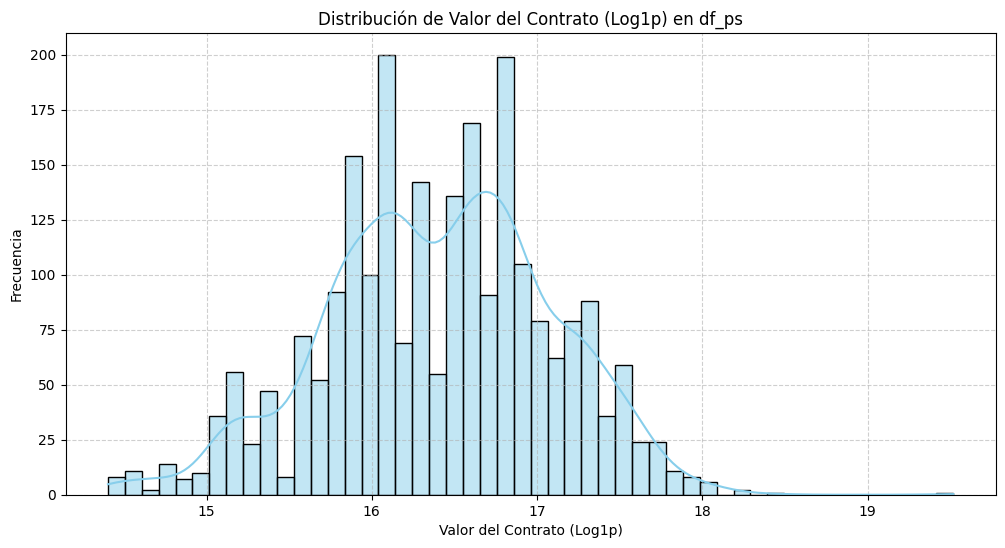


--- Histograma para 'valor_contrato' en df_ps (Escala Lineal) ---


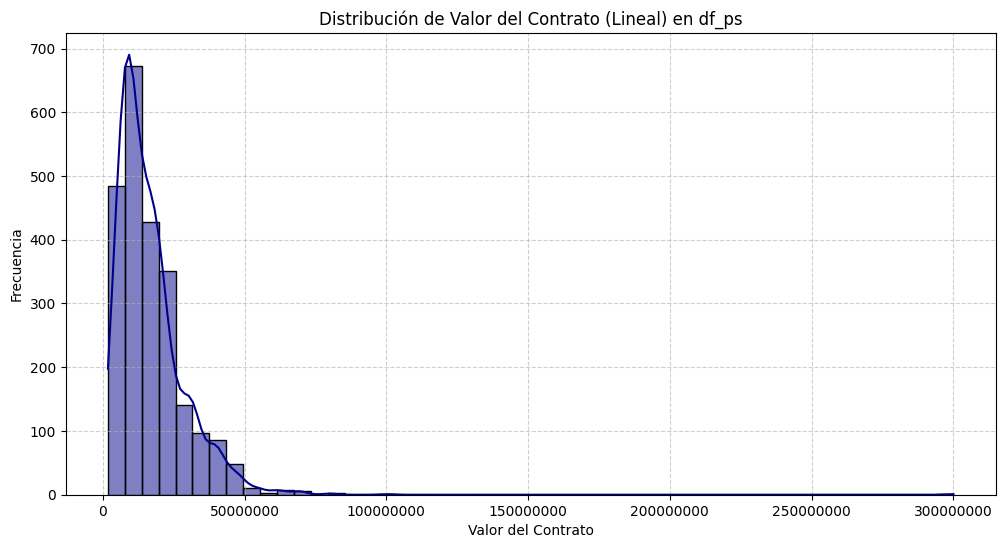


--- Histograma para 'valor_contrato' en df_empresas (Escala Logarítmica) ---


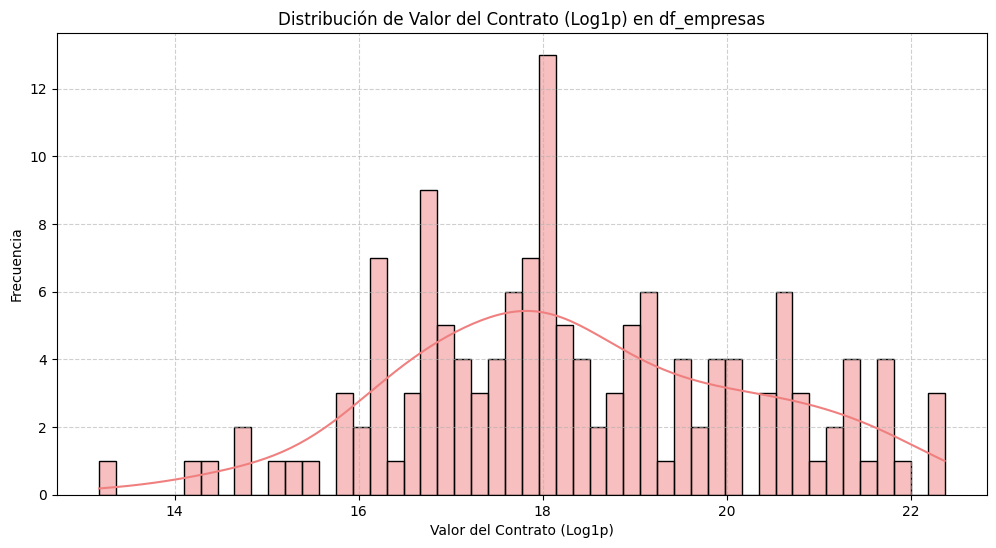


--- Histograma para 'valor_contrato' en df_empresas (Escala Lineal) ---


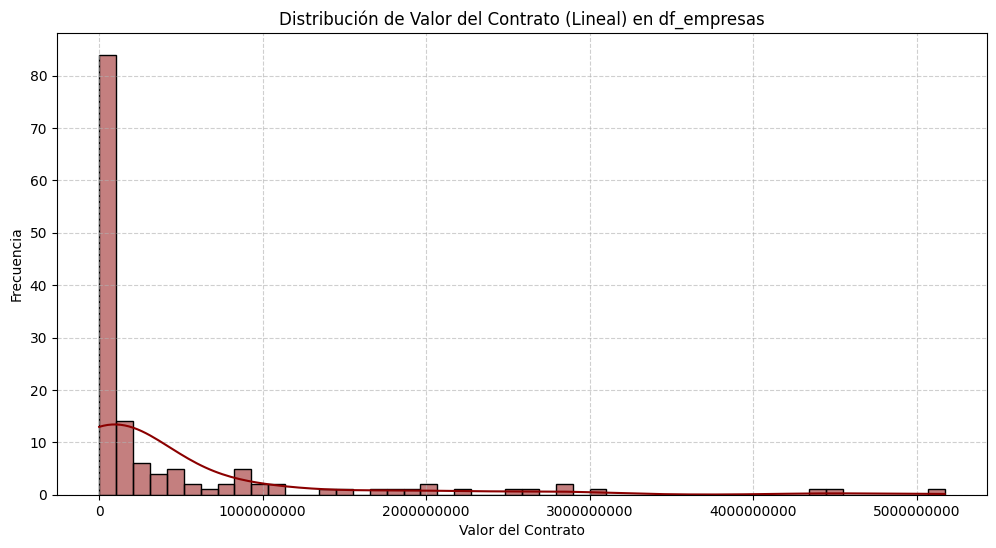


--- Generación de histogramas por DataFrame completada ---


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("--- Generando histogramas para 'valor_contrato' de cada nuevo DataFrame ---")

# Histograma para df_cero
print("\n--- Análisis de 'valor_contrato' en df_cero ---")
if not df_cero.empty and (df_cero['valor_contrato'] == 0).all():
    print("  ✅ Todos los contratos en df_cero tienen 'valor_contrato' igual a 0. No se genera histograma.")
else:
    print("  ⚠️ df_cero está vacío o contiene valores diferentes a 0. Se procederá a generar un histograma si aplica.")
    if not df_cero.empty:
        plt.figure(figsize=(12, 6))
        sns.histplot(df_cero['valor_contrato'], kde=True, bins=50, color='gray')
        plt.title('Distribución de Valor del Contrato en df_cero')
        plt.xlabel('Valor del Contrato')
        plt.ylabel('Frecuencia')
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()

# Histograma para df_ps (con escala logarítmica)
print("\n--- Histograma para 'valor_contrato' en df_ps (Escala Logarítmica) ---")
if not df_ps.empty:
    valor_ps_filtrado = df_ps[df_ps['valor_contrato'] > 0]['valor_contrato']
    if not valor_ps_filtrado.empty:
        valor_ps_log = np.log1p(valor_ps_filtrado)
        plt.figure(figsize=(12, 6))
        sns.histplot(valor_ps_log, kde=True, bins=50, color='skyblue')
        plt.title('Distribución de Valor del Contrato (Log1p) en df_ps')
        plt.xlabel('Valor del Contrato (Log1p)')
        plt.ylabel('Frecuencia')
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()
    else:
        print("  ⚠️ df_ps solo contiene contratos con valor 0 o negativo. No se genera histograma logarítmico.")
else:
    print("  ⚠️ df_ps está vacío. No se genera histograma.")

# Histograma para df_ps (con escala lineal)
print("\n--- Histograma para 'valor_contrato' en df_ps (Escala Lineal) ---")
if not df_ps.empty:
    valor_ps_filtrado = df_ps[df_ps['valor_contrato'] > 0]['valor_contrato']
    if not valor_ps_filtrado.empty:
        plt.figure(figsize=(12, 6))
        sns.histplot(valor_ps_filtrado, kde=True, bins=50, color='darkblue')
        plt.title('Distribución de Valor del Contrato (Lineal) en df_ps')
        plt.xlabel('Valor del Contrato')
        plt.ylabel('Frecuencia')
        plt.ticklabel_format(style='plain', axis='x') # Formato lineal
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()
    else:
        print("  ⚠️ df_ps solo contiene contratos con valor 0 o negativo. No se genera histograma lineal.")
else:
    print("  ⚠️ df_ps está vacío. No se genera histograma.")

# Histograma para df_empresas (con escala logarítmica)
print("\n--- Histograma para 'valor_contrato' en df_empresas (Escala Logarítmica) ---")
if not df_empresas.empty:
    valor_empresas_filtrado = df_empresas[df_empresas['valor_contrato'] > 0]['valor_contrato']
    if not valor_empresas_filtrado.empty:
        valor_empresas_log = np.log1p(valor_empresas_filtrado)
        plt.figure(figsize=(12, 6))
        sns.histplot(valor_empresas_log, kde=True, bins=50, color='lightcoral')
        plt.title('Distribución de Valor del Contrato (Log1p) en df_empresas')
        plt.xlabel('Valor del Contrato (Log1p)')
        plt.ylabel('Frecuencia')
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()
    else:
        print("  ⚠️ df_empresas solo contiene contratos con valor 0 o negativo. No se genera histograma logarítmico.")
else:
    print("  ⚠️ df_empresas está vacío. No se genera histograma.")

# Histograma para df_empresas (con escala lineal)
print("\n--- Histograma para 'valor_contrato' en df_empresas (Escala Lineal) ---")
if not df_empresas.empty:
    valor_empresas_filtrado = df_empresas[df_empresas['valor_contrato'] > 0]['valor_contrato']
    if not valor_empresas_filtrado.empty:
        plt.figure(figsize=(12, 6))
        sns.histplot(valor_empresas_filtrado, kde=True, bins=50, color='darkred')
        plt.title('Distribución de Valor del Contrato (Lineal) en df_empresas')
        plt.xlabel('Valor del Contrato')
        plt.ylabel('Frecuencia')
        plt.ticklabel_format(style='plain', axis='x') # Formato lineal
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()
    else:
        print("  ⚠️ df_empresas solo contiene contratos con valor 0 o negativo. No se genera histograma lineal.")
else:
    print("  ⚠️ df_empresas está vacío. No se genera histograma.")

print("\n--- Generación de histogramas por DataFrame completada ---")

# **ANÁLISIS DE LENGUAJE BASICO**


En adelante analizaremos los 2 data set df_empresas y df_ps (o prestadores de servicio) de manera individual



